In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load the data
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [5]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [6]:
model = RandomForestRegressor(random_state=1)

# Train the model
model.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

The number of estimators is by default value 100. We can try on vary number of estimator and observe the performance later. The parameter of n_estimators is the number of trees in the forest.

In [7]:
def plot_density(x, y):
  plt.scatter(train_features['Molar volume'], train_labels, label='Data')
  plt.plot(x, y, color='r', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

In [8]:
pred_y = model.predict(train_features)
pred_y

array([5.40965, 5.62466, 5.55904, 5.33036, 5.25686, 5.34802, 4.88357,
       4.99445, 5.43951, 5.51224, 5.29339, 5.28148, 5.41383, 6.16889,
       5.49111, 5.23313, 5.51111, 5.35373, 5.35303, 5.0073 , 5.69689,
       5.41289, 5.37581, 4.96565, 5.45265, 5.37229, 5.7571 , 5.29897,
       4.70805, 5.49869, 5.60461, 5.31719, 5.58279, 5.49801, 5.41567,
       5.46124, 5.39654, 5.34494, 5.2521 , 5.5171 ])

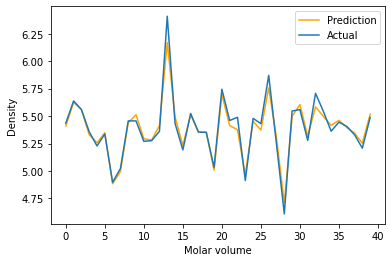

In [9]:
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()
plt.show()

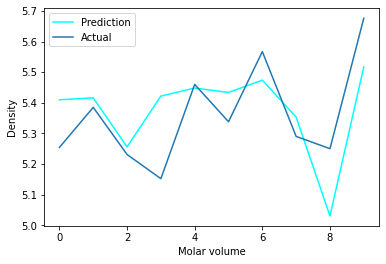

In [10]:
pred_test = model.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()
plt.show()

In [11]:
differences = (1 - sum(abs(pred_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

88.76470000000008

In [12]:
test_acc = []
axes = []

for i in range(1,101):
  axes.append(i)
  est_model = RandomForestRegressor(random_state=1, n_estimators=i)
  est_model.fit(train_features, train_labels)
  est_pred_y = est_model.predict(test_features)
  acc = (1 - sum(abs(est_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
  est_pred_accuracy = acc.item()
  test_acc.append(est_pred_accuracy)
  print('Test accuracy for {} estimator is {}'.format(i, est_pred_accuracy))

Test accuracy for 1 estimator is 86.39999999999996
Test accuracy for 2 estimator is 88.02999999999997
Test accuracy for 3 estimator is 88.36666666666663
Test accuracy for 4 estimator is 88.62999999999998
Test accuracy for 5 estimator is 89.74799999999996
Test accuracy for 6 estimator is 90.0483333333333
Test accuracy for 7 estimator is 91.0885714285714
Test accuracy for 8 estimator is 90.58874999999998
Test accuracy for 9 estimator is 90.09555555555553
Test accuracy for 10 estimator is 90.04499999999997
Test accuracy for 11 estimator is 89.93818181818179
Test accuracy for 12 estimator is 89.68666666666661
Test accuracy for 13 estimator is 89.6407692307692
Test accuracy for 14 estimator is 89.67714285714281
Test accuracy for 15 estimator is 89.77266666666664
Test accuracy for 16 estimator is 89.53874999999998
Test accuracy for 17 estimator is 89.75999999999999
Test accuracy for 18 estimator is 89.63055555555553
Test accuracy for 19 estimator is 89.56052631578947
Test accuracy for 20 est

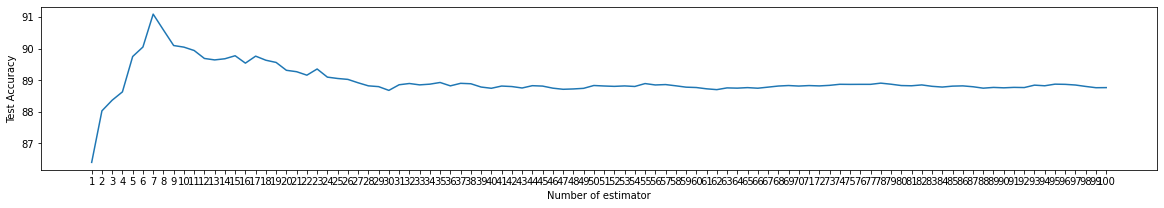

In [13]:
original_axis = list(range(0,len(test_acc)))
plt.figure(figsize=(20, 3))
plt.plot(test_acc)
locs, labels = plt.xticks()
plt.xticks(original_axis,axes)
plt.xlabel('Number of estimator')
plt.ylabel('Test Accuracy')
plt.show()

Based on testing, it shows that 7 is optimum value for number of trees. Now, we can try on adjusting the random_state. According to documentation, the random_state parameter is to controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features)

In [14]:
rand_test_acc = []
rand_axes = []

for i in range(0,20):
  rand_axes.append(i)
  rand_model = RandomForestRegressor(random_state=i, n_estimators=7)
  rand_model.fit(train_features, train_labels)
  rand_pred_y = rand_model.predict(test_features)
  rand_acc = (1 - sum(abs(rand_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
  rand_pred_accuracy = rand_acc.item()
  rand_test_acc.append(rand_pred_accuracy)
  print('Test accuracy for random state number {} is {}'.format(i, rand_pred_accuracy))

Test accuracy for random state number 0 is 89.60142857142856
Test accuracy for random state number 1 is 91.0885714285714
Test accuracy for random state number 2 is 90.26285714285713
Test accuracy for random state number 3 is 89.85142857142856
Test accuracy for random state number 4 is 90.0685714285714
Test accuracy for random state number 5 is 89.1785714285714
Test accuracy for random state number 6 is 91.36571428571423
Test accuracy for random state number 7 is 90.17714285714284
Test accuracy for random state number 8 is 88.69571428571426
Test accuracy for random state number 9 is 89.60571428571428
Test accuracy for random state number 10 is 88.45142857142851
Test accuracy for random state number 11 is 89.57428571428568
Test accuracy for random state number 12 is 88.71714285714283
Test accuracy for random state number 13 is 90.47428571428568
Test accuracy for random state number 14 is 90.97999999999999
Test accuracy for random state number 15 is 90.35714285714288
Test accuracy for ran

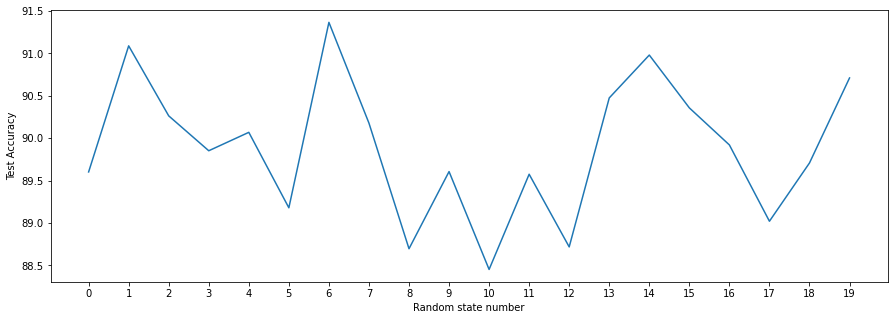

In [15]:
original_axis = list(range(0,len(rand_test_acc)))
plt.figure(figsize=(15, 5))
plt.plot(rand_test_acc)
locs, labels = plt.xticks()
plt.xticks(original_axis,rand_axes)
plt.xlabel('Random state number')
plt.ylabel('Test Accuracy')
plt.show()

In [16]:
final_model = RandomForestRegressor(random_state=7, n_estimators=7)
final_model.fit(train_features, train_labels)
final_pred_y = final_model.predict(test_features)
final_acc = (1 - sum(abs(final_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
final_pred_accuracy = final_acc.item()

print('Test accuracy :',final_pred_accuracy)

Test accuracy : 90.17714285714284


#**K-Fold Cross-Validation**

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

score_mean = []
score_std = []

split_num = 7

for i in range(2, split_num):
  # create a KFold object with n splits 
  kf = KFold(n_splits = i, shuffle = True, random_state = 10)
  scores = cross_val_score(model, train_features, train_labels, scoring='r2', cv=kf)
  m = np.mean(scores)
  s = np.std(scores)
  score_mean.append(m)
  score_std.append(s)
  print('Number of splits: %d, Accuracy: %.3f, Standard Devidation: %.3f' % (i, m, s))

Number of splits: 2, Accuracy: 0.598, Standard Devidation: 0.012
Number of splits: 3, Accuracy: 0.609, Standard Devidation: 0.040
Number of splits: 4, Accuracy: 0.645, Standard Devidation: 0.125
Number of splits: 5, Accuracy: 0.619, Standard Devidation: 0.229
Number of splits: 6, Accuracy: 0.548, Standard Devidation: 0.348


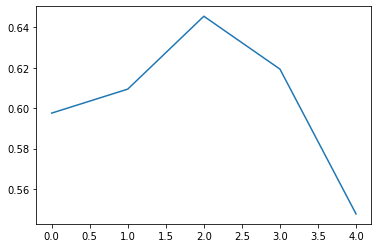

In [18]:
plt.plot(score_mean)